# Regresion Líneal sencilla con Stats

## Relaciones lineales

Armemos una relación entre Celsius y Farenheit

In [2]:
c = lambda f: 5/9*(f-32)

Armemos una comprensión de lista con esta función para todas las temeperaturas del 0 al 100 de 10 en 10

In [3]:
temperaturas = [(f, c(f)) for f in range(0,101,10)]

In [4]:
temperaturas

[(0, -17.77777777777778),
 (10, -12.222222222222223),
 (20, -6.666666666666667),
 (30, -1.1111111111111112),
 (40, 4.444444444444445),
 (50, 10.0),
 (60, 15.555555555555557),
 (70, 21.11111111111111),
 (80, 26.666666666666668),
 (90, 32.22222222222222),
 (100, 37.77777777777778)]

Importa Pandas

In [5]:
import pandas as pd

Creamos un DataFrame con las listas

In [6]:
temps_df = pd.DataFrame(temperaturas, columns=['Farenheit','Celsius'])

In [8]:
temps_df.head(11)

,Farenheit,Celsius
0,0,-17.777778
1,10,-12.222222
2,20,-6.666667
3,30,-1.111111
4,40,4.444444
5,50,10.000000
6,60,15.555556
7,70,21.111111
8,80,26.666667
9,90,32.222222


Arma una gráfica que muestre esta relación

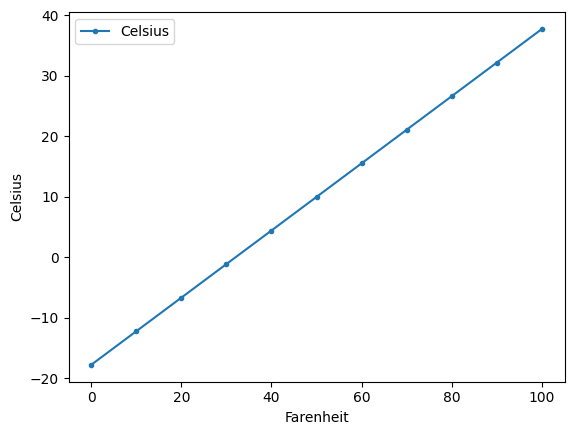

In [11]:
axes = temps_df.plot(x='Farenheit',y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius') 

Ponle etiquetas

y = mx + b

## Regresión lineal con King_county

Carga los datos de King county a un dataframe

In [12]:
df_kc_house = pd.read_csv('kc_house_data.csv')

Veamos el Head

In [13]:
df_kc_house.head(10)

,sqft,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0
5,5420,1230000.0
6,1715,257500.0
7,1060,291850.0
8,1780,229500.0
9,1890,323000.0


Veamos el Tail

In [14]:
df_kc_house.tail(7)

,sqft,price
21606,3510,1010000.0
21607,1310,475000.0
21608,1530,360000.0
21609,2310,400000.0
21610,1020,402101.0
21611,1600,400000.0
21612,1020,325000.0


Vamos cambiando los titulos de columnas

In [15]:
df_kc_house.columns=['AreaFt','PrecioVenta']

Ceca tu nuevo head

In [16]:
df_kc_house.head(5)

,AreaFt,PrecioVenta
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


Importa stats de scipy

In [17]:
from scipy import stats

Arma un modelo de regresión lineal

In [18]:
reglin = stats.linregress(x=df_kc_house.AreaFt, y=df_kc_house.PrecioVenta)

Chea la pendiente

In [22]:
print(reglin.slope)

280.8066899295009


Checa la intercepción

In [23]:
print(reglin.intercept)

-43867.60153385613


PrecioVenta = 280.80*Areaft - 43,867.60

Vamos a predecir el precio de alguna casa

In [25]:
reglin.slope*1250 + reglin.intercept

np.float64(307140.76087802)

Compara con la realidad

### Hacer la gráfica

Importa Seaborn

In [26]:
import seaborn as sns

Pon el estilo como Whitegrid

In [27]:
sns.set_style('whitegrid')

Arma una regplot de sns

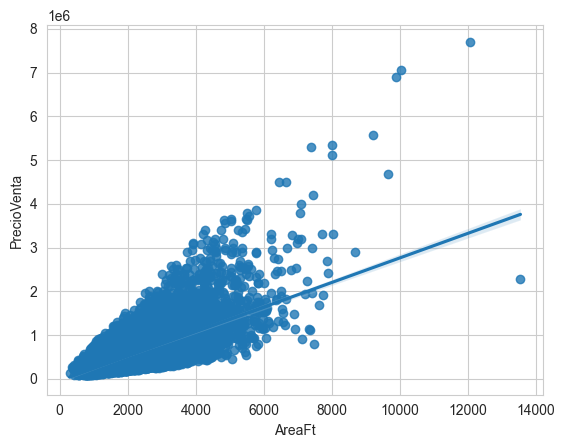

In [28]:
axes = sns.regplot(x=df_kc_house.AreaFt, y=df_kc_house.PrecioVenta)